# Question 2

Let $A$ be defined as the $n\times n$ matrix defined by 

$$a_{jj}=2 \text{ for } 1\leq j\leq  n,$$

$$a_{j,j-1}=-1  \text{ for } 2\leq j\leq n$$

$$a_{j,j+1}=-1 \text{ for } 1\leq j\leq n-1$$

Hence, $A$ is a matrix with the diagonal being constant $2$ and the direct upper and lower off-diagonal are constant -1.

Let $\hat{x}\in\mathbb{R}^n$ be the vector defined by $(\hat{x}_i)=\frac{i}{n+1},i=1,...,n$


a) For $n=40$, compute the eigenvalues and eigenvectors of the matrix $A$. 

b) Normalise the eigenvectors in the $\infty$-norm.

c) Plot the eigenvectors $3,6,10$ against $\hat{x}$ in three different plots. 

d) For each case find the corresponding $y$ from part (1) and plot this function with high resolution, so that the approximate and exact eigenvectors can be easily compared.

e) Compare the corresponding computed eigenvalues of $A$, multiplied by $(n+1)^2$ with the corresponding eigenvalues obtained in (1)


2a) For $n=40$, compute the eigenvalues and eigenvectors of the matrix $A$. 

In [79]:
import numpy as np
import array_to_latex as a2l

n = 40

A= np.zeros((n,n))
A+=np.diag(-1*np.ones(n-1),-1)+np.diag(2*np.ones(n))+np.diag(-1*np.ones(n-1),1)

For $n=5$ just to get an idea:

\begin{bmatrix}
  2.00 & -1.00 &  0.00 &  0.00 &  0.00\\
 -1.00 &  2.00 & -1.00 &  0.00 &  0.00\\
  0.00 & -1.00 &  2.00 & -1.00 &  0.00\\
  0.00 &  0.00 & -1.00 &  2.00 & -1.00\\
  0.00 &  0.00 &  0.00 & -1.00 &  2.00
\end{bmatrix}

In [80]:
# get the eigenvalues & eigenvectors of A

eigenvalues, eigenvectors=np.linalg.eigh(A)

#sort the eigenvalues 
sort_indices = np.argsort(eigenvalues) #gets the positions of values (when arranged properly)
eigenvalues = eigenvalues[sort_indices] #change the original array
eigenvectors = eigenvectors[:,sort_indices] #sort the eigenvectors


2b) Normalise the eigenvectors in the $\infty$-norm.

In [81]:
lst_norm_eigenvectors = []
transposed_vector = eigenvectors.T
for eigenvector in transposed_vector:
    denominator  = np.max(np.abs(eigenvector))
    normalised_eigenvector = eigenvector/denominator
    lst_norm_eigenvectors.append(normalised_eigenvector)
    

2c) Plot the eigenvectors $3,6,10$ against $\hat{x}$ in three different plots. 

[]

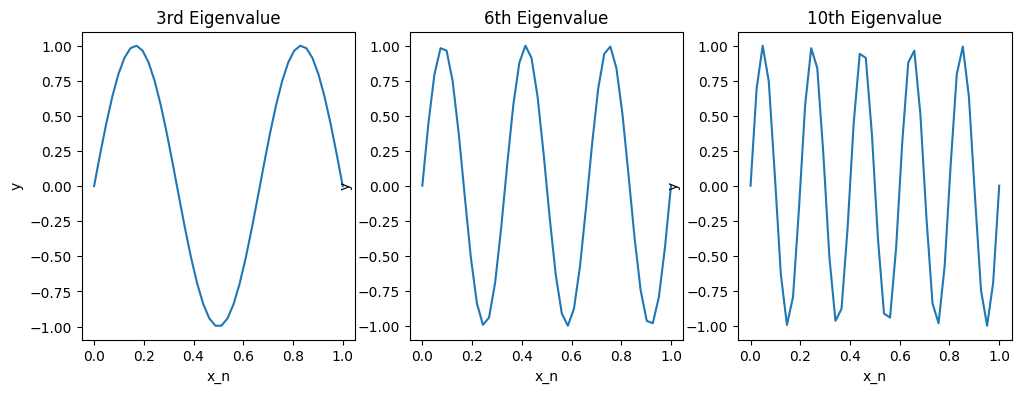

In [83]:
import matplotlib.pyplot as plt 

def add_zero(array,number):
    new = np.insert(array,0,number) 
    new = np.append(new,number)
    return new

# x point
xa_n=np.linspace(0,1,42)

# For the 3rd smallest eigenvalue
third_eigen_norm = add_zero(lst_norm_eigenvectors[2],0)
# For the 6th smallest eigenvalue
sixth_eigen_norm = add_zero(-lst_norm_eigenvectors[5],0)
# For the 10th smallest eigenvalue
tenth_eigen_norm = add_zero(-lst_norm_eigenvectors[9],0)

plt.figure(figsize=(12,4))

#plot 3rd
plt.subplot(1,3,1)
plt.title('3rd Eigenvalue')
plt.plot(x_n,third_eigen_norm)
plt.xlabel('x_n')
plt.ylabel('y')

#plot 6th 
plt.subplot(1,3,2)
plt.title('6th Eigenvalue')
plt.plot(x_n,sixth_eigen_norm)
plt.xlabel('x_n')
plt.ylabel('y')

#plot 10th 
plt.subplot(1,3,3)
plt.title('10th Eigenvalue')
plt.plot(x_n,tenth_eigen_norm)
plt.xlabel('x_n')
plt.ylabel('y')

plt.plot()

2d) For each case find the corresponding $y$ from part (1) and plot this function with high resolution, so that the approximate and exact eigenvectors can be easily compared.

$$y_k = \pm\sin{(k\pi x)} $$

[]

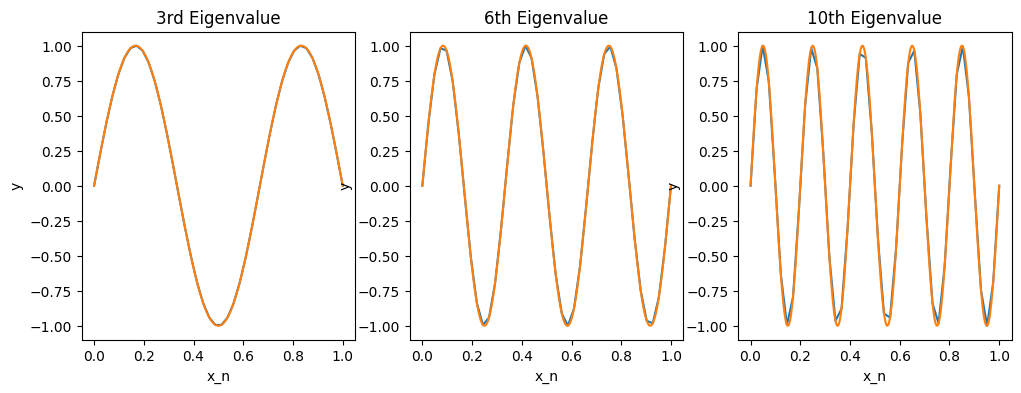

In [85]:

#function from question 1)
x  = np.linspace(0,1,1000)
def f(x,n):
    return np.sin(n*np.pi*x)


plt.figure(figsize=(16,3))

#plot 3rd
plt.subplot(1,3,1)
plt.title('3rd Eigenvalue')
plt.plot(x_n,third_eigen_norm)
plt.plot(x,f(x,3))
plt.xlabel('x_n')
plt.ylabel('y')

#plot 6th 
plt.subplot(1,3,2)
plt.title('6th Eigenvalue')
plt.plot(x_n,sixth_eigen_norm)
plt.plot(x,f(x,6))
plt.xlabel('x_n')
plt.ylabel('y')

#plot 10th 
plt.subplot(1,3,3)
plt.title('10th Eigenvalue')
plt.plot(x_n,tenth_eigen_norm)
plt.plot(x,f(x,10))
plt.xlabel('x_n')
plt.ylabel('y')

plt.plot()

2e) Compare the corresponding computed eigenvalues of $A$, multiplied by $(n+1)^2$ with the corresponding eigenvalues obtained in (1)

In [93]:
#eigenvalues from calculations
required_eigenvalues  = np.array([eigenvalues[2],eigenvalues[5],eigenvalues[10]])
required_eigenvalues=required_eigenvalues*(n+1)**2
required_eigenvalues

array([  88.43598492,  349.0913975 , 1125.17499604])

In [94]:
#eigenvalues from function
def function_eigenvalues(k):
    return (k*np.pi)**2

function_eigenvalues = np.array([function_eigenvalues(3),function_eigenvalues(6),function_eigenvalues(10)])
function_eigenvalues

array([ 88.82643961, 355.30575844, 986.96044011])

In [97]:
#percentage error of eigenvalues compared to eigenfunction
percentage_error = (function_eigenvalues-required_eigenvalues)/function_eigenvalues
percentage_error*100


array([  0.43957034,   1.7490178 , -14.0040624 ])

In [95]:
#doing this for all 
eigenvalues_estimate=eigenvalues*41**2
true_eigenvlaues_all=[(i*np.pi)**2 for i in range(1,41)]
percentage_error_all=(true_eigenvlaues_all-eigenvalues_estimate)/true_eigenvlaues_all
percentage_error_all

array([4.89176732e-04, 1.95555847e-03, 4.39570345e-03, 7.80388742e-03,
       1.21721216e-02, 1.74901780e-02, 2.37456209e-02, 3.09238467e-02,
       3.90081291e-02, 4.79796716e-02, 5.78176661e-02, 6.84993580e-02,
       8.00001171e-02, 9.22935140e-02, 1.05351402e-01, 1.19144004e-01,
       1.33640006e-01, 1.48806649e-01, 1.64609837e-01, 1.81014234e-01,
       1.97983373e-01, 2.15479773e-01, 2.33465041e-01, 2.51899999e-01,
       2.70744794e-01, 2.89959017e-01, 3.09501828e-01, 3.29332068e-01,
       3.49408387e-01, 3.69689360e-01, 3.90133605e-01, 4.10699905e-01,
       4.31347323e-01, 4.52035316e-01, 4.72723849e-01, 4.93373502e-01,
       5.13945580e-01, 5.34402216e-01, 5.54706469e-01, 5.74822420e-01])